# Mini Project 3

### Problem Statement
Customer Analysis is a detailed analysis of a company’s customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviours and concerns of different types of customers. Customer analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment
Features Information:
ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

Perform clustering to summarize customer segments.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pandas.core.apply import frame_apply
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the dataset
df=pd.read_csv('customer_data.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/13,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/14,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
print(df.dtypes)

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [9]:
# Check the unique values in categorical columns
print(df['Education'].unique())
print(df['Marital_Status'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [10]:
#checking null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
df=df.dropna()
df.shape

(2216, 29)

In [12]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

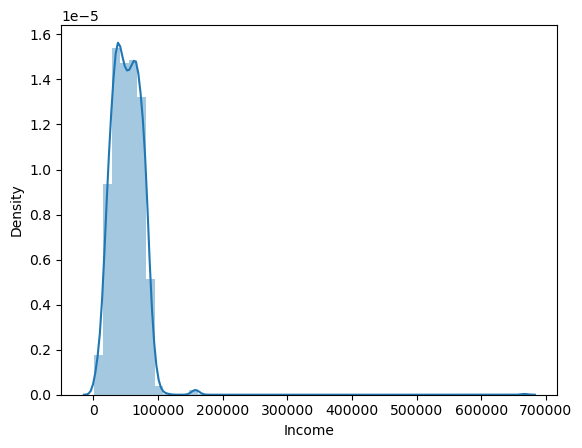

In [13]:
sns.distplot(df['Income'])
plt.show()

## Data Visualization 

In [14]:
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [15]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [16]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [17]:
# Combining different dataframe 
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Expenses'].head(12)

0     1617
1       27
2      776
3       53
4      422
5      716
6      590
7      169
8       46
9       49
11      61
12    1102
Name: Expenses, dtype: int64

In [18]:
df['Expenses'].describe()

count    2216.000000
mean      607.075361
std       602.900476
min         5.000000
25%        69.000000
50%       396.500000
75%      1048.000000
max      2525.000000
Name: Expenses, dtype: float64

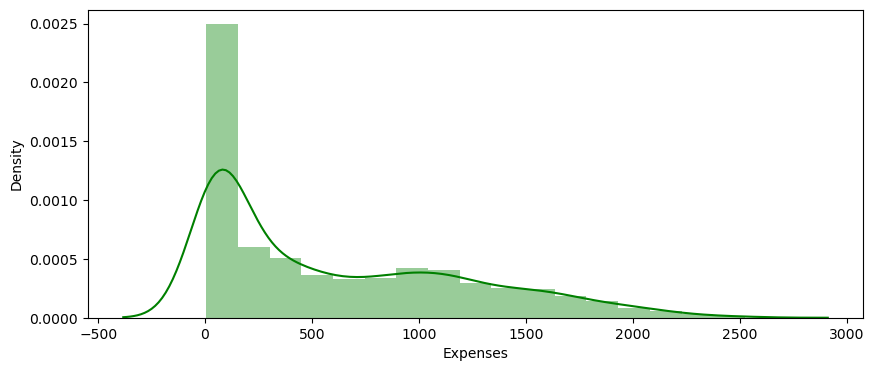

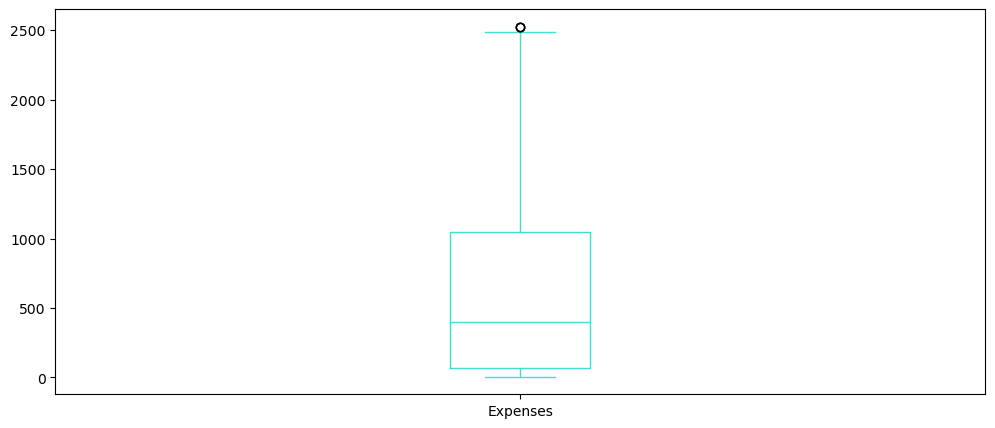

In [19]:
plt.figure(figsize=(10,4))
sns.distplot(df["Expenses"],color = 'green')
plt.show()
df["Expenses"].plot.box(figsize=(12,5),color='turquoise')
plt.show()

In [20]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4']

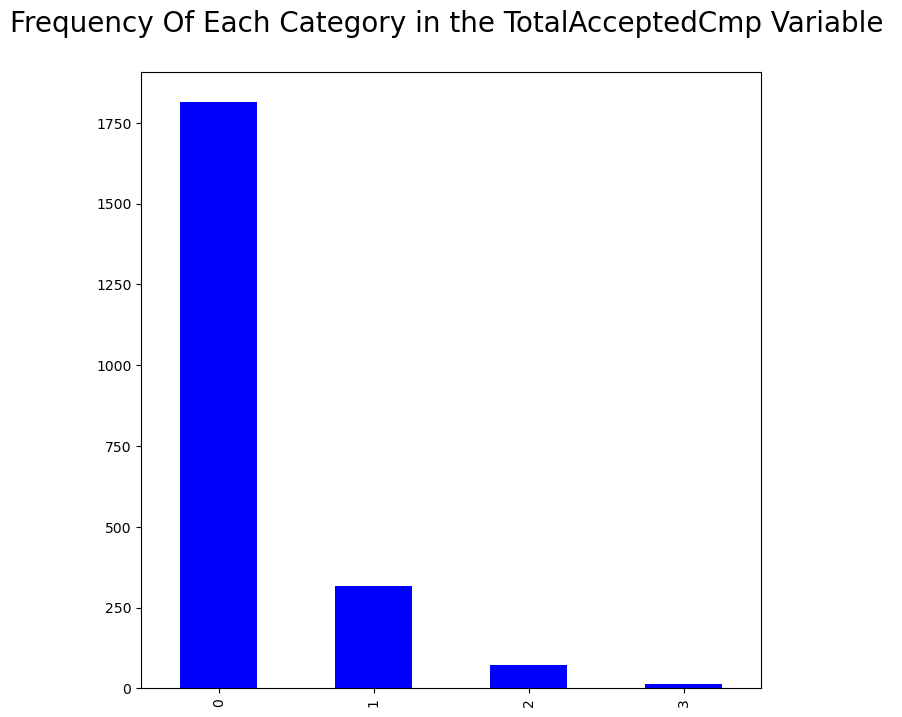

In [21]:
#VISUALIZING THE -TotalAcceptedCmp
plt.figure(figsize=(8,8))
df['TotalAcceptedCmp'].value_counts().plot(kind='bar',color = 'blue',linewidth = 3)
plt.title("Frequency Of Each Category in the TotalAcceptedCmp Variable \n",fontsize=20)
plt.show()

In [22]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2, 16, 15,  5, 26,  9, 13, 12, 43, 17,
       20, 14, 11, 18, 28,  7, 24,  4, 29, 23, 27, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44], dtype=int64)

In [23]:
df[['NumTotalPurchases']]

,NumTotalPurchases
0,25
1,6
2,21
3,8
4,19
...,...
2235,18
2236,22
2237,19
2238,23


In [24]:
df['NumTotalPurchases'].describe()

count    2216.000000
mean       14.880866
std         7.670957
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: NumTotalPurchases, dtype: float64

In [25]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/12,58,635,...,0,0,0,0,3,11,1,1617,0,25
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/14,38,11,...,0,0,0,0,3,11,0,27,0,6
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/13,26,426,...,0,0,0,0,3,11,0,776,0,21
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/14,26,11,...,0,0,0,0,3,11,0,53,0,8
4,5324,1981,PhD,Married,58293.0,1,0,19/01/14,94,173,...,0,0,0,0,3,11,0,422,0,19


In [26]:
#ADDING A COLUMN "customer_Age" IN THE DATAFRAME

df['Customer_Age'] = (pd.Timestamp('now').year) - df['Year_Birth']

In [27]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/12,58,635,...,0,0,0,3,11,1,1617,0,25,66
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/14,38,11,...,0,0,0,3,11,0,27,0,6,69
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/13,26,426,...,0,0,0,3,11,0,776,0,21,58
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/14,26,11,...,0,0,0,3,11,0,53,0,8,39
4,5324,1981,PhD,Married,58293.0,1,0,19/01/14,94,173,...,0,0,0,3,11,0,422,0,19,42


In [28]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["Year_Birth","ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)

In [29]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Z_CostContact,Z_Revenue,Response,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,Graduation,Single,58138.0,04/09/12,58,0,3,11,1,1617,0,25,66
1,Graduation,Single,46344.0,08/03/14,38,0,3,11,0,27,0,6,69
2,Graduation,Together,71613.0,21/08/13,26,0,3,11,0,776,0,21,58
3,Graduation,Together,26646.0,10/02/14,26,0,3,11,0,53,0,8,39
4,PhD,Married,58293.0,19/01/14,94,0,3,11,0,422,0,19,42


In [30]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)

In [31]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Z_CostContact,Z_Revenue,Response,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,Graduation,Single,58138.0,2012-04-09,58,0,3,11,1,1617,0,25,66
1,Graduation,Single,46344.0,2014-08-03,38,0,3,11,0,27,0,6,69
2,Graduation,Together,71613.0,2013-08-21,26,0,3,11,0,776,0,21,58
3,Graduation,Together,26646.0,2014-10-02,26,0,3,11,0,53,0,8,39
4,PhD,Married,58293.0,2014-01-19,94,0,3,11,0,422,0,19,42


In [32]:
df['Customer_Age'].describe()

count    2216.000000
mean       54.179603
std        11.985554
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Customer_Age, dtype: float64

In [33]:
df.drop(['Dt_Customer','Recency','Complain','Response'],axis=1,inplace=True)

In [34]:
df.head()

,Education,Marital_Status,Income,Z_CostContact,Z_Revenue,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,Graduation,Single,58138.0,3,11,1617,0,25,66
1,Graduation,Single,46344.0,3,11,27,0,6,69
2,Graduation,Together,71613.0,3,11,776,0,21,58
3,Graduation,Together,26646.0,3,11,53,0,8,39
4,PhD,Married,58293.0,3,11,422,0,19,42


In [35]:
df['Customer_Age'].describe()

count    2216.000000
mean       54.179603
std        11.985554
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Customer_Age, dtype: float64

In [36]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [37]:
df = df[df['Customer_Age'] < 90]
df = df[df['Income'] < 300000]

In [38]:
df.shape

(2212, 9)

In [39]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables available:", object_cols)

Categorical variables available: ['Education', 'Marital_Status']


In [40]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [41]:
scaler = StandardScaler()
scaler.fit(df)
scale_df = pd.DataFrame(scaler.transform(df),columns= df.columns )
print("All features are now scaled")

All features are now scaled


In [42]:
df.head()

,Education,Marital_Status,Income,Z_CostContact,Z_Revenue,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,2,4,58138.0,3,11,1617,0,25,66
1,2,4,46344.0,3,11,27,0,6,69
2,2,5,71613.0,3,11,776,0,21,58
3,2,5,26646.0,3,11,53,0,8,39
4,4,3,58293.0,3,11,422,0,19,42


In [43]:
from sklearn.metrics import silhouette_score

def calculate_silhouette_scores(df):
    silhouette_score_lst = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters=i)
        cluster_labels = kmeans.fit_predict(df)
        silhouette_score_lst.append(silhouette_score(df, cluster_labels))
    return silhouette_score_lst

# Call the function with your data 'X'
silhouette_scores = calculate_silhouette_scores(df)

In [44]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scale_df)
    inertia.append(kmeans.inertia_)

In [45]:
silhouette_scores

[0.6062003877103228,
 0.5412726291982173,
 0.5300267821180229,
 0.5374689762452599,
 0.5387476288273859,
 0.5214433439019528,
 0.5145310901593165,
 0.5214142589422666,
 0.5217808407455283]

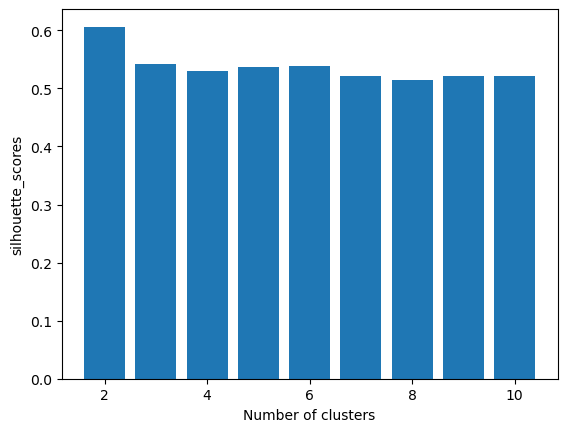

In [46]:
# plotting
k = [2,3,4,5,6,7,8,9,10]
plt.bar(k,silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("silhouette_scores")
plt.show()

### Bar which is having high value is selected i.e. 2. So number of clusters will be 2.

In [47]:
# Based on the Elbow Method
k_optimal = 2

In [48]:
df = df.copy()

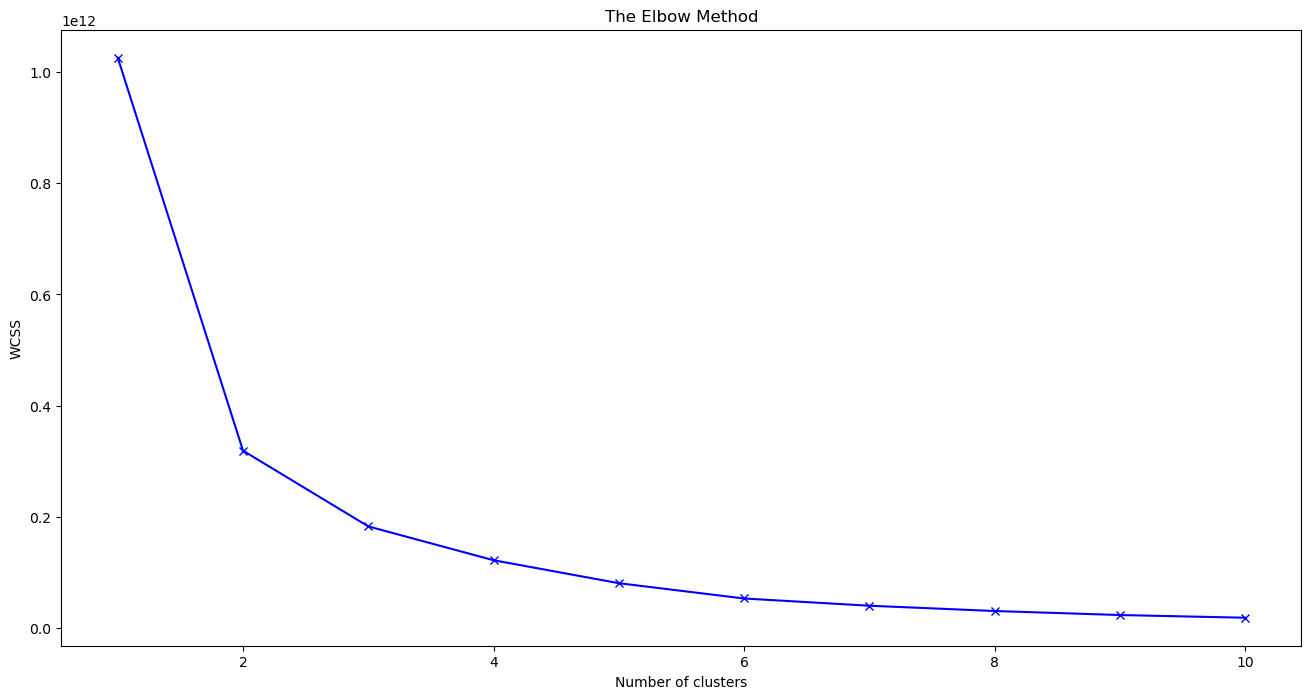

In [49]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
#using K-Means Algorithm.

kmeans=KMeans(n_clusters=2, random_state=42).fit(df)
pred=kmeans.predict(df)

df['cluster_Kmeans'] = pred + 1

In [51]:
df.head()

,Education,Marital_Status,Income,Z_CostContact,Z_Revenue,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,cluster_Kmeans
0,2,4,58138.0,3,11,1617,0,25,66,2
1,2,4,46344.0,3,11,27,0,6,69,1
2,2,5,71613.0,3,11,776,0,21,58,2
3,2,5,26646.0,3,11,53,0,8,39,1
4,4,3,58293.0,3,11,422,0,19,42,2


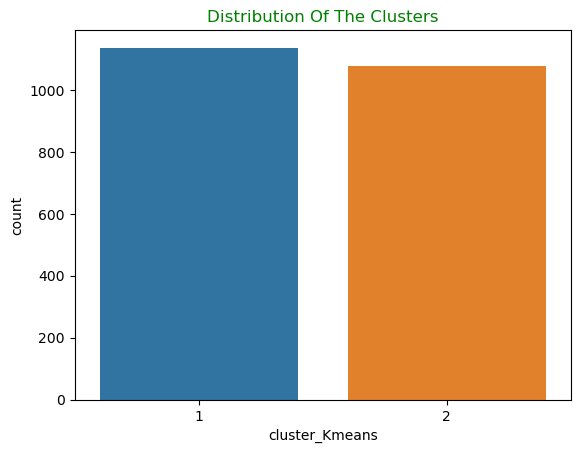

In [52]:
sns.countplot(x=df["cluster_Kmeans"])
plt.title("Distribution Of The Clusters",color = 'green')
plt.show()

# Agglomerative Clustering

In [53]:
df.head()

,Education,Marital_Status,Income,Z_CostContact,Z_Revenue,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,cluster_Kmeans
0,2,4,58138.0,3,11,1617,0,25,66,2
1,2,4,46344.0,3,11,27,0,6,69,1
2,2,5,71613.0,3,11,776,0,21,58,2
3,2,5,26646.0,3,11,53,0,8,39,1
4,4,3,58293.0,3,11,422,0,19,42,2


In [54]:
df_1 = df.copy()

In [55]:
df_1.head()

,Education,Marital_Status,Income,Z_CostContact,Z_Revenue,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,cluster_Kmeans
0,2,4,58138.0,3,11,1617,0,25,66,2
1,2,4,46344.0,3,11,27,0,6,69,1
2,2,5,71613.0,3,11,776,0,21,58,2
3,2,5,26646.0,3,11,53,0,8,39,1
4,4,3,58293.0,3,11,422,0,19,42,2


In [56]:
from sklearn.decomposition import PCA
#Initiating PCA to reduce dimentions
pca = PCA(n_components=3)
pca.fit(df_1)
PCA_ds = pd.DataFrame(pca.transform(df_1), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-2.393951e-12,21532.579256,-50229.739835,-16730.878036,-590.359660,16540.956346,110399.892036
col2,2212.0,-1.033049e-13,367.189675,-2221.294526,-206.729402,37.046741,225.132475,2950.774371
col3,2212.0,-1.276054e-15,11.455240,-27.862331,-9.026965,0.543039,8.159955,29.491349


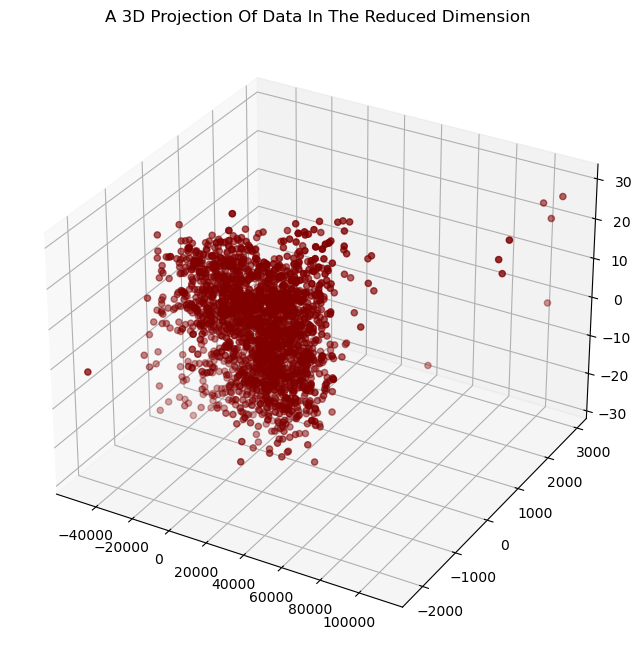

In [57]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")

plt.show()

In [58]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

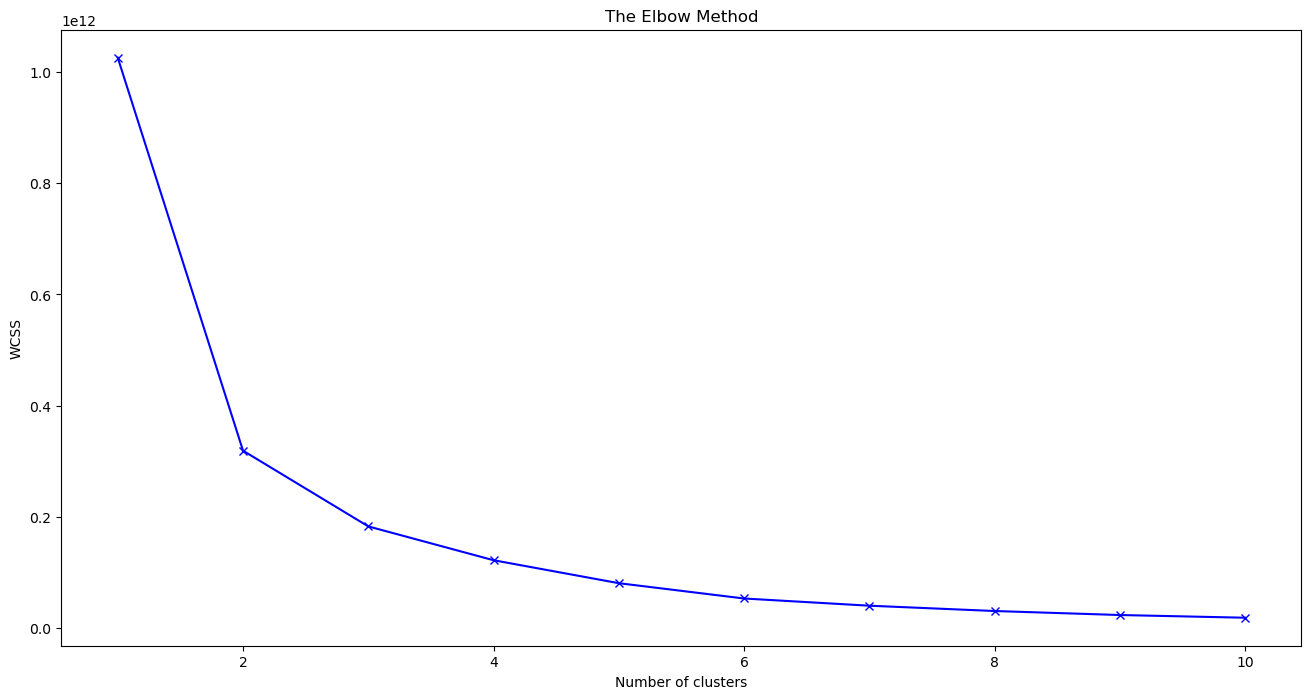

In [59]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(PCA_ds)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [60]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=2)

# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

#Adding the Clusters feature to the orignal dataframe.
df_1["Cluster_Agglo"]= yhat_AC + 1

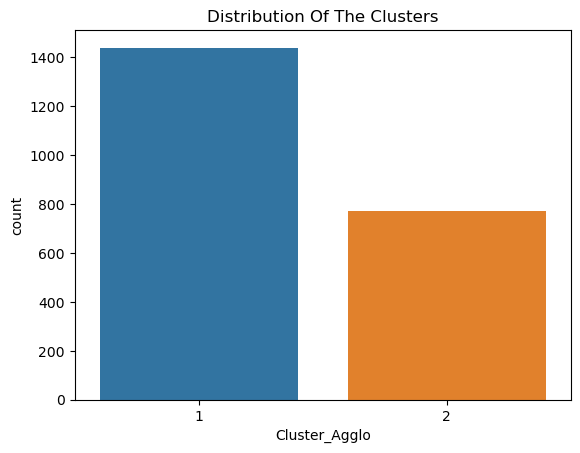

In [61]:
sns.countplot(x=df_1["Cluster_Agglo"])
plt.title("Distribution Of The Clusters")
plt.show()

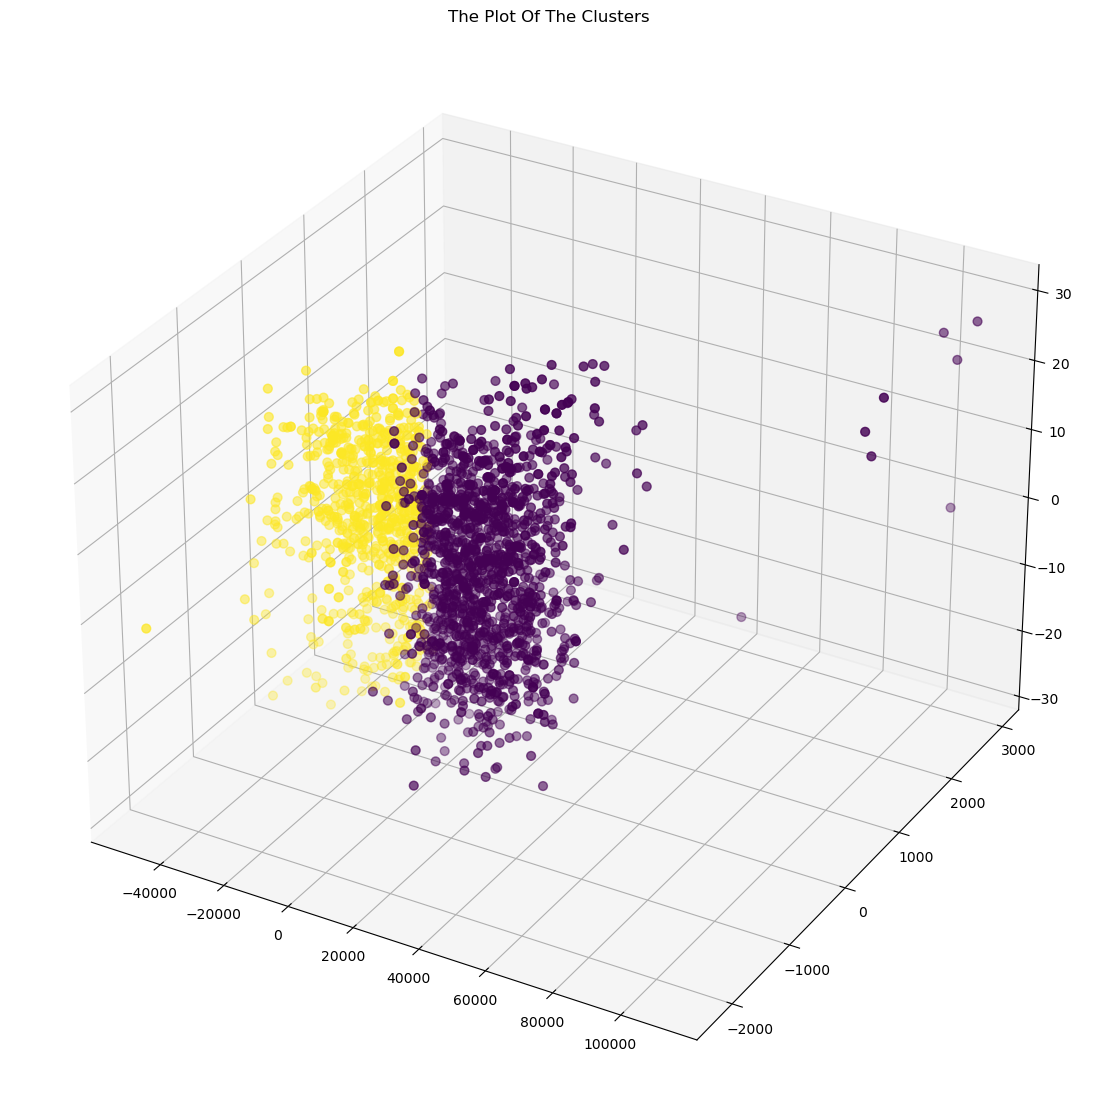

In [62]:
#Plotting the clusters
fig = plt.figure(figsize=(16,14))
ax = plt.subplot(111, projection='3d', label="bla")

ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")

plt.show()

### Cluster 1:
People with less expenses, people who are married and parents of more than Three kids, people with low income

### Cluster 2:
people with more expenses, people who are single or parents who have less than Three kids, people with high income, Age is not the criteria but it is observed to some extent that people who are older fall in this group.